=== Sales by Product ===
   product  total_qty  revenue
    Laptop          5  3757.00
   Monitor          5   754.00
Headphones         10   351.40
  Keyboard          9   228.00
     Mouse         12   123.45

=== Overall Totals ===
 total_qty  total_revenue
        41        5213.85


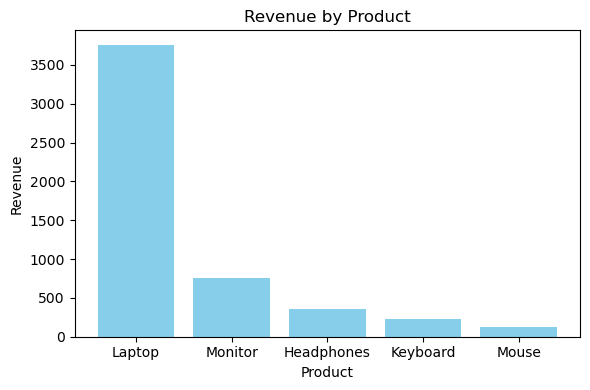

Chart saved to: sales_chart.png


In [42]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DB_PATH = Path("sales_data.db")  # current folder me file
CHART_PATH = Path("sales_chart.png")

def ensure_db_with_sample_data(conn):
    cur = conn.cursor()
    cur.execute(
        """
        CREATE TABLE IF NOT EXISTS sales (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            sale_date TEXT NOT NULL,
            product TEXT NOT NULL,
            quantity INTEGER NOT NULL,
            price REAL NOT NULL
        );
        """
    )
    conn.commit()

    cur.execute("SELECT COUNT(*) FROM sales;")
    count = cur.fetchone()[0]
    if count == 0:
        # Minimal sample rows
        rows = [
            ("2025-06-01", "Laptop", 3, 749.00),
            ("2025-06-02", "Mouse", 5, 9.99),
            ("2025-06-03", "Keyboard", 4, 24.50),
            ("2025-06-04", "Monitor", 2, 149.00),
            ("2025-06-05", "Headphones", 6, 34.90),
            ("2025-06-06", "Mouse", 7, 10.50),
            ("2025-06-07", "Laptop", 2, 755.00),
            ("2025-06-08", "Monitor", 3, 152.00),
            ("2025-06-09", "Keyboard", 5, 26.00),
            ("2025-06-10", "Headphones", 4, 35.50),
        ]
        cur.executemany(
            "INSERT INTO sales (sale_date, product, quantity, price) VALUES (?, ?, ?, ?);",
            rows
        )
        conn.commit()

def main():
    conn = sqlite3.connect(DB_PATH.as_posix())
    ensure_db_with_sample_data(conn)

    group_query = """
    SELECT
        product,
        SUM(quantity) AS total_qty,
        ROUND(SUM(quantity * price), 2) AS revenue
    FROM sales
    GROUP BY product
    ORDER BY revenue DESC;
    """

    totals_query = """
    SELECT
        SUM(quantity) AS total_qty,
        ROUND(SUM(quantity * price), 2) AS total_revenue
    FROM sales;
    """

    df = pd.read_sql_query(group_query, conn)
    totals = pd.read_sql_query(totals_query, conn)

    # Print outputs
    print("=== Sales by Product ===")
    print(df.to_string(index=False))
    print("\n=== Overall Totals ===")
    print(totals.to_string(index=False))

    # Matplotlib bar chart
    plt.figure(figsize=(6,4))
    plt.bar(df["product"], df["revenue"], color="skyblue")
    plt.title("Revenue by Product")
    plt.xlabel("Product")
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.savefig("sales_chart.png")  # Save chart as PNG
    plt.show()

    conn.close()
    print(f"Chart saved to: {CHART_PATH}")

if __name__ == "__main__":
    main()
